# Demo: Access Distributed NASA Earth Science Data from OPeNDAP Services from your Python Workspace
## Analyze the difference of radiation between January and July

### Step 1. Load python modules: pydap, basemap, numpy, and matplotlib

In [1]:
%matplotlib inline
from pydap.client import open_url
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Define spatial extent of your interest (North America)

In [2]:
# BBOX for CONUS
west = -124.848974
south = 24.396308
east = -66.885444
north = 49.384358

# BBOX for North America
#west = -170.0
#south = 20.0
#east = -50.0
#north = 80.0

### Step 3. Connect to a climatology data set on the ORNL DAAC OPeNDAP server and list its variables

In [3]:
dataset = open_url("http://thredds.daac.ornl.gov/thredds/dodsC/ornldaac/542/climate6190_RAD.nc4")
dataset.keys()

['RAD', 'lat', 'climatology_bounds', 'lat_bnds', 'lon_bnds', 'time', 'lon']

### Step 4. Check attributes of variable 'RAD'

In [4]:
dataset.RAD.attributes

{'_ChunkSizes': [6, 180, 360],
 '_FillValue': -9999,
 'cell_methods': 'time: mean within months time: mean over years',
 'long_name': 'Radiation',
 'units': 'w/m2',
 'valid_range': [0, 1000]}

### Step 5. Check dimensions of variable 'RAD'

In [5]:
dataset.RAD.array.dimensions

('time', 'lat', 'lon')

### Step 6. Check size of variable 'RAD'

In [6]:
dataset.RAD.array.shape

(12, 360, 720)

### Step 7. Find out indices for the spatial extent of your interest

#### Step 7.1. Retrieve latitudes

In [7]:
lats = dataset.lat[:]
lats

array([-89.75, -89.25, -88.75, -88.25, -87.75, -87.25, -86.75, -86.25,
       -85.75, -85.25, -84.75, -84.25, -83.75, -83.25, -82.75, -82.25,
       -81.75, -81.25, -80.75, -80.25, -79.75, -79.25, -78.75, -78.25,
       -77.75, -77.25, -76.75, -76.25, -75.75, -75.25, -74.75, -74.25,
       -73.75, -73.25, -72.75, -72.25, -71.75, -71.25, -70.75, -70.25,
       -69.75, -69.25, -68.75, -68.25, -67.75, -67.25, -66.75, -66.25,
       -65.75, -65.25, -64.75, -64.25, -63.75, -63.25, -62.75, -62.25,
       -61.75, -61.25, -60.75, -60.25, -59.75, -59.25, -58.75, -58.25,
       -57.75, -57.25, -56.75, -56.25, -55.75, -55.25, -54.75, -54.25,
       -53.75, -53.25, -52.75, -52.25, -51.75, -51.25, -50.75, -50.25,
       -49.75, -49.25, -48.75, -48.25, -47.75, -47.25, -46.75, -46.25,
       -45.75, -45.25, -44.75, -44.25, -43.75, -43.25, -42.75, -42.25,
       -41.75, -41.25, -40.75, -40.25, -39.75, -39.25, -38.75, -38.25,
       -37.75, -37.25, -36.75, -36.25, -35.75, -35.25, -34.75, -34.25,
      

#### Step 7.2. Retrieve longitudes 

In [8]:
lons = dataset.lon[:]
lons

array([-179.75, -179.25, -178.75, -178.25, -177.75, -177.25, -176.75,
       -176.25, -175.75, -175.25, -174.75, -174.25, -173.75, -173.25,
       -172.75, -172.25, -171.75, -171.25, -170.75, -170.25, -169.75,
       -169.25, -168.75, -168.25, -167.75, -167.25, -166.75, -166.25,
       -165.75, -165.25, -164.75, -164.25, -163.75, -163.25, -162.75,
       -162.25, -161.75, -161.25, -160.75, -160.25, -159.75, -159.25,
       -158.75, -158.25, -157.75, -157.25, -156.75, -156.25, -155.75,
       -155.25, -154.75, -154.25, -153.75, -153.25, -152.75, -152.25,
       -151.75, -151.25, -150.75, -150.25, -149.75, -149.25, -148.75,
       -148.25, -147.75, -147.25, -146.75, -146.25, -145.75, -145.25,
       -144.75, -144.25, -143.75, -143.25, -142.75, -142.25, -141.75,
       -141.25, -140.75, -140.25, -139.75, -139.25, -138.75, -138.25,
       -137.75, -137.25, -136.75, -136.25, -135.75, -135.25, -134.75,
       -134.25, -133.75, -133.25, -132.75, -132.25, -131.75, -131.25,
       -130.75, -130

#### Step 7.3. Calculate indices

In [9]:
idx_west = np.argmin(np.abs(lons - west))
idx_south = np.argmin(np.abs(lats - south))
idx_east = np.argmin(np.abs(lons - east))
idx_north = np.argmin(np.abs(lats - north))
print [idx_west, idx_south, idx_east, idx_north]

[110, 228, 226, 278]


### Step 8. Retrieve subsets of the radiation data in January and July for North America. Calculate the radiation difference between July and January

In [10]:
rad_na_jan = dataset.RAD[0,idx_south:idx_north,idx_west:idx_east]
lats_subset = rad_na_jan.lat[:]
lons_subset = rad_na_jan.lon[:]
rad_na_jan = np.ma.masked_where(rad_na_jan.RAD==dataset.RAD._FillValue, rad_na_jan.RAD)
rad_na_jul = dataset.RAD[6,idx_south:idx_north,idx_west:idx_east]
rad_na_jul = np.ma.masked_where(rad_na_jul.RAD==dataset.RAD._FillValue, rad_na_jul.RAD)

rad_na_diff=rad_na_jul-rad_na_jan

### Step 9. Plot the radiation difference on a map

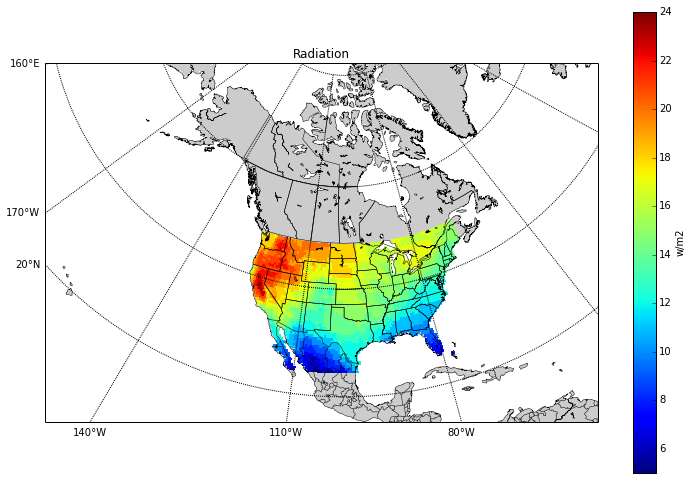

In [11]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
m = Basemap(llcrnrlon=-145.5,\
                    llcrnrlat=1.,\
                    urcrnrlon=-2.566,\
                    urcrnrlat=46.352,\
                    rsphere=(6378137.00,6356752.3142),\
                    resolution='l',\
                    area_thresh=1000.,\
                    projection='lcc',\
                    lat_1=50.,
                    lon_0=-100.,
                    ax=ax)
X, Y = m(*np.meshgrid(lons_subset, lats_subset))
Z = np.mean(rad_na_diff, axis=0)
colors = m.pcolor(X, Y, Z)
cb = plt.colorbar(colors)
cb.set_label(dataset.RAD.units)
m.drawlsmask()
m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])
ax.set_title(dataset.RAD.long_name)
plt.show()